In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uk_police = pd.read_csv('UK_Police_Street_Crime_2018-10-01_to_2021_09_31.csv')

In [3]:
uk_police.shape

(18994562, 13)

Hay un total de 18994562 de crimenes reportados a lo largo de todo el territorio de UK en el periodo 2018 y 2021

In [4]:
uk_police.head(5)

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft,Status update unavailable,NaN
1,1,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery,Investigation complete; no suspect identified,NaN
2,2,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft,Investigation complete; no suspect identified,NaN
3,3,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN
4,4,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN


In [5]:
uk_police.describe(include='all')

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
count,1.899456e+07,14315206,18994562,18994562,18994562,1.861576e+07,1.861576e+07,18994562,18130470,18130470,18994562,14021832,0.0
unique,NaN,13889023,36,45,45,NaN,NaN,267595,34749,34749,14,27,NaN
top,NaN,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2018-10,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,On or near Supermarket,E01033595,Westminster 013E,Violence and sexual offences,Investigation complete; no suspect identified,NaN
freq,NaN,69,582863,3371292,3371292,NaN,NaN,590160,22520,22520,5659834,5228532,NaN
mean,9.497280e+06,NaN,NaN,NaN,NaN,-1.344472e+00,5.243434e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,5.483258e+06,NaN,NaN,NaN,NaN,1.490382e+00,1.192104e+00,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,-8.148313e+00,4.989215e+01,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.748640e+06,NaN,NaN,NaN,NaN,-2.153157e+00,5.149627e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.497280e+06,NaN,NaN,NaN,NaN,-1.264998e+00,5.211650e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.424592e+07,NaN,NaN,NaN,NaN,-1.690290e-01,5.342297e+01,NaN,NaN,NaN,NaN,NaN,NaN


* Los casos mas reportados an sido para `Metropolitan Police Service`, con 3371292 (18% aprox.)
* Donde se registra mas casos en cercano a los `supermercados` (14% de todos los casos)
* los casos mas reportados son `Violence and Sexual Offences` con un total de 5659834 (30% aprox.) de todos los casos
* Vemos que la mayoria de los casos terminan con un resultado: `Investigation complete; no suspect identified` (28% aprox.)

In [9]:
uk_police.isnull().sum()

Unnamed: 0                      0
Crime ID                  4679356
Month                           0
Reported by                     0
Falls within                    0
Longitude                  378800
Latitude                   378800
Location                        0
LSOA code                  864092
LSOA name                  864092
Crime type                      0
Last outcome category     4972730
Context                  18994562
dtype: int64

La variable Context se puede ver que esta vacio, se tiene que eliminar porque no aporta nada al analisis 

In [5]:
len(pd.unique(uk_police['Location']))

267595

Hay 267595 lugares donde se reportaron delitos ocurrido en toda el territorios en UK (periodo 2018 a 2020)

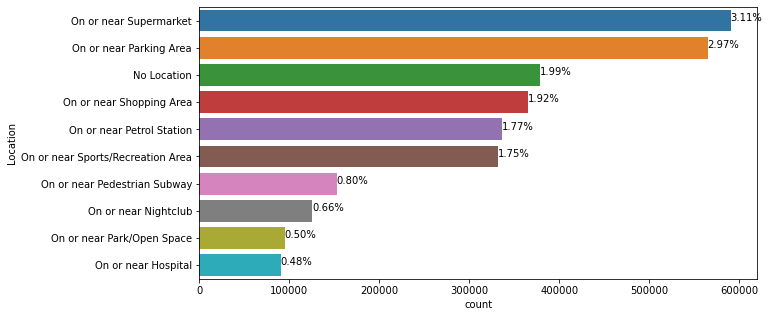

In [11]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = uk_police, y = 'Location',order=uk_police['Location'].value_counts().iloc[:10].index)

total = len(uk_police['Location'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

Los 2 lugares con mayor incidencia en cometer crimenes es cercano a Supermarket y Area Parking, son lugares muy concurridos de gente, la tercera locaciones es no tener idea de donde se cometieron tales delitos, estos 3 lugares representan  8.07% de todos los crimenes

In [7]:
uk_police.drop(columns=['Unnamed: 0','Context'],inplace=True)

In [8]:
month = uk_police.groupby(['Month']).agg(Count = ('Crime ID','count'))

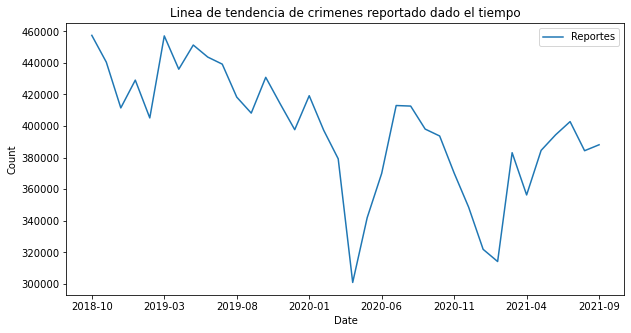

In [9]:
month.plot(figsize = (10,5))
plt.title('Linea de tendencia de crimenes reportado dado el tiempo')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['Reportes'])
plt.show()

La incidencia de crimenes reportadas a traves del tiempo en el periodo 2018 a 2021, tienes muchos picos a traves del periodo, siendo el pico mas alto reportado a inicios del año 2019, a partir de esa fecha el reporte de criminalidad a comenzado a bajar, Esto puede tener que ver mas que todo por la pandemia, en la fecha mediados del año 2020 tiene una bajada muy pronunciada y a la vez una subida muy alta a la vez llevando a los niveles que los tiempos anteriores.
Los picos mas bajos son muy pronunciados y ambos se presentan en el año 2020 (mediados y finales), se debe analizar porque de estos picos

---
## __Analizaremos la localizacion del `supermercado` como es lo mas habitual en el periodo 2018 a 2021__

In [10]:
loc = uk_police[uk_police['Location']=='On or near Supermarket'].reset_index()

In [11]:
loc.head(5)

,index,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,45,959f5c46c542eb23b3b2a0de4d794897b26d02ae8206dd...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.82306,53.925465,On or near Supermarket,E01010695,Bradford 002D,Other theft,Investigation complete; no suspect identified
1,49,aff8153d104a291442ea2ef71fffe330d9555b31d6e88a...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.82306,53.925465,On or near Supermarket,E01010695,Bradford 002D,Shoplifting,Local resolution
2,51,f140cfe79bcf1e8ce855511140f3a97a3cb536a55f3f9c...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.82306,53.925465,On or near Supermarket,E01010695,Bradford 002D,Shoplifting,Unable to prosecute suspect
3,261,NaN,2020-01,West Yorkshire Police,West Yorkshire Police,-1.90431,53.875127,On or near Supermarket,E01010708,Bradford 006C,Anti-social behaviour,NaN
4,263,7e22e08aa3dbaa0814e093962456a8b6ec9ccc486f3031...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.90431,53.875127,On or near Supermarket,E01010708,Bradford 006C,Drugs,Local resolution


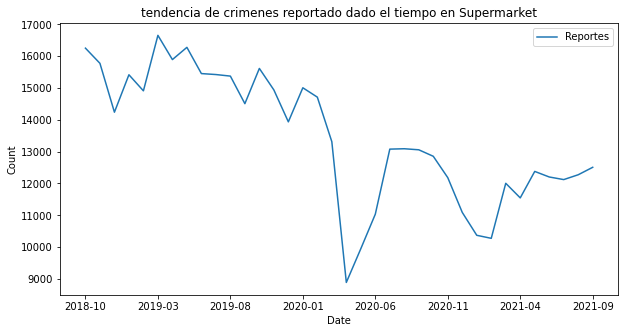

In [64]:
month_loc = loc.groupby(['Month']).agg(Count = ('Crime ID','count'))
month_loc.plot(figsize = (10,5))
plt.title('tendencia de crimenes reportado dado el tiempo en Supermarket')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['Reportes'])
plt.show()

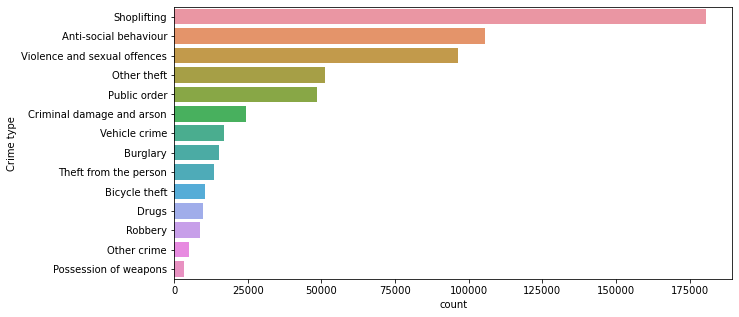

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data = loc, y = 'Crime type',order=loc['Crime type'].value_counts().index)
sns.title('Crime Type 2018 to 2020 UK')
plt.show()

In [13]:
loc['Crime type'].value_counts(normalize=True).head(5)

Shoplifting                     0.305548
Anti-social behaviour           0.178858
Violence and sexual offences    0.163047
Other theft                     0.086895
Public order                    0.082068
Name: Crime type, dtype: float64

En la mayoria de los casos lo que se reporta en los supermercados son robos como `Shoplifting`, `Anti-social behaviour` y `Violence and sexual offences` que entre estos tres representa un total de 64.75% de casos totales, para saber como acaba estas investigacion que ocurren en los supermercados hay que analisar: __Last outcome category__

In [14]:
loc['Last outcome category'].value_counts(normalize=True).head(8)

Investigation complete; no suspect identified          0.459572
Unable to prosecute suspect                            0.193706
Status update unavailable                              0.127679
Court result unavailable                               0.083416
Under investigation                                    0.040796
Local resolution                                       0.027181
Awaiting court outcome                                 0.017119
Further investigation is not in the public interest    0.010613
Name: Last outcome category, dtype: float64

En los mayorias de los casos no se logra tener una resolucion que pueda saber quien hizo el delito (46%), mientras que en los otros casos mas frecuentes no se puede saber si como va la investigacion de los casos reportados

### __Veremos los 3 tipos de conclusiones__

In [15]:
inv = loc[loc["Last outcome category"].isin(['Investigation complete; no suspect identified',
                                            'Unable to prosecute suspect',
                                             'Status update unavailable'])]
inv.drop(columns=['index'],inplace=True)
inv['Last outcome category'].value_counts()

C:\Users\isusk\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Investigation complete; no suspect identified    222711
Unable to prosecute suspect                       93871
Status update unavailable                         61874
Name: Last outcome category, dtype: int64

In [16]:
inv.groupby(['Last outcome category','Crime type'])['Crime ID'].count()

Last outcome category                          Crime type                  
Investigation complete; no suspect identified  Bicycle theft                    7943
                                               Burglary                         9611
                                               Criminal damage and arson       14216
                                               Drugs                             346
                                               Other crime                      1638
                                               Other theft                     33023
                                               Possession of weapons             514
                                               Public order                    17478
                                               Robbery                          4179
                                               Shoplifting                     87529
                                               Theft from the person      

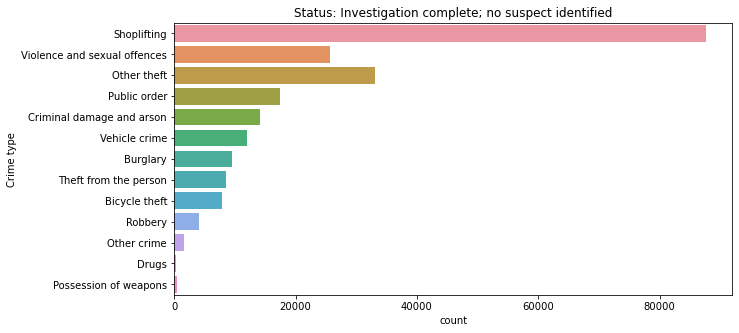

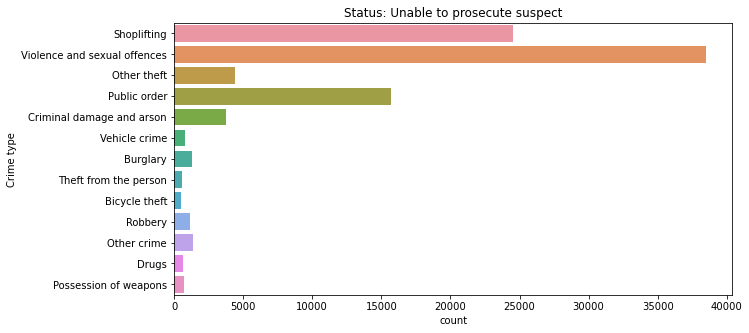

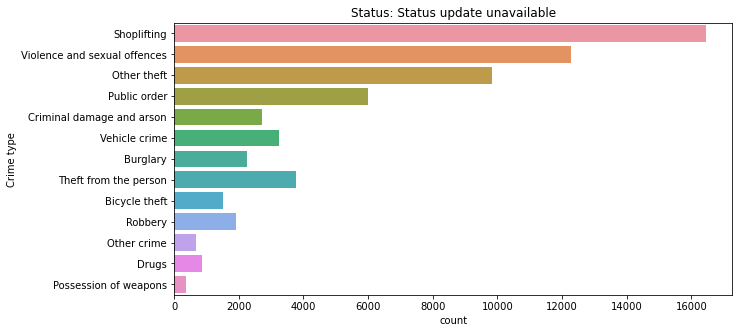

In [66]:
for l in inv['Last outcome category'].unique():
    plt.figure(figsize = (10,5))
    sns.countplot(y = 'Crime type',order=inv['Crime type'].value_counts(ascending=False).index,data=inv[inv['Last outcome category'] == l]).set_title('Status: {}'.format(l))
    plt.show()


* En la conclusion de la investigacion `Investigation complete; no suspect identified` la mayoria de los casos son robos menores como `Shoplifting` con amplia mayoria
* En `Status update unavailable ` la mayoria son: `Shoplifting` y `Violence and sexual offences`
* En `Unable to prosecute suspect` tiene la mayoria de los casos en `Violence and sexual offences` lo cual muestra un gran problema para resolver este problema

In [17]:
inv['Reported by'].value_counts(normalize=True).head(5)

Metropolitan Police Service    0.215586
Hampshire Constabulary         0.048584
Thames Valley Police           0.043746
West Yorkshire Police          0.042206
West Midlands Police           0.038253
Name: Reported by, dtype: float64

Los casos reportados en los supermercados en su mayoria la investigacion lo hacen `Metropolitan Police Service` 

---
## __Ahora analizaremos `Metropolitan Police Service`__ 

In [18]:
report = uk_police[uk_police['Reported by']=='Metropolitan Police Service'].reset_index()
report.drop(columns=['index'],inplace=True)
report.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN


In [19]:
report['Crime type'].value_counts(normalize=True)

Anti-social behaviour           0.283963
Violence and sexual offences    0.205969
Vehicle crime                   0.097997
Other theft                     0.088662
Burglary                        0.059739
Public order                    0.047328
Criminal damage and arson       0.046851
Drugs                           0.040438
Theft from the person           0.035711
Shoplifting                     0.033462
Robbery                         0.026996
Bicycle theft                   0.018730
Other crime                     0.009022
Possession of weapons           0.005132
Name: Crime type, dtype: float64

Los crimenes que mayormente se reporta en `Metropolitan Police Service`: Anti-social behaviour, Violence and sexual offences que representa un total 49% de todos los crimenes que reportan

<AxesSubplot:xlabel='count', ylabel='Crime type'>

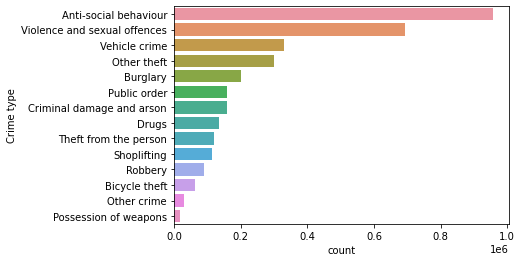

In [31]:
sns.countplot(data = report, y = 'Crime type',order=report['Crime type'].value_counts().index)

esto nos puede indicar que __Metropolitan Police Service__ reportan casos de disturbio menores como principales delito `Anti-social behaviour` y otros casos mas complejos como es `Violence and sexual offences`

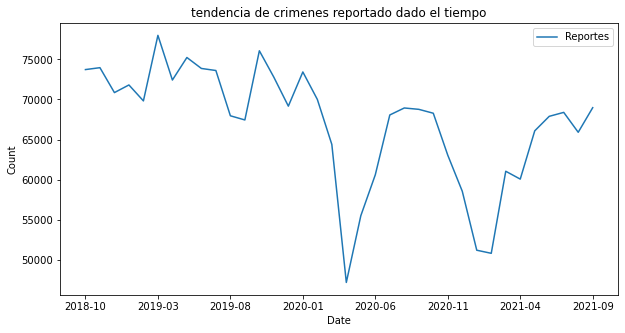

In [63]:
month_report = report.groupby(['Month']).agg(Count = ('Crime ID','count'))
month_report.plot(figsize = (10,5))
plt.title('tendencia de crimenes reportado dado el tiempo')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['Reportes'])
plt.show()

__Metropolitan Police Service__ Tiene un comportamiento similar a la poblacion general de todos los casos en UK, esto tambien se debe a que es el servicio central del pais por lo cual le afecta mas directamente los casos a este Police Service

---
## __Vamos a analizar los crimenes mas comunes que ocurre en Uk: `Violence and Sexual Offences`__

In [74]:
violence = uk_police[uk_police['Crime type']=='Violence and sexual offences']
violence.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
9,5d29ad94964e1939ebe7232546727544c792087db7d0f0...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect
17,7b4fb7cc3bfb2c88e1689077c560577a7405736ffe2e1b...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.819597,53.923411,On or near Sefton Drive,E01010692,Bradford 001D,Violence and sexual offences,Status update unavailable
18,7c7817bf2a06b55252c23564380da0513565ae74e1ddad...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.819121,53.920696,On or near Crossbeck Close,E01010692,Bradford 001D,Violence and sexual offences,Unable to prosecute suspect
54,53f74a72854880766153d7ec0aa9666431a95048a849a4...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.822354,53.926776,On or near Weston Road,E01010695,Bradford 002D,Violence and sexual offences,Unable to prosecute suspect
55,6d2ee7ca0f7a8be94f733efa115532906d6f4589828356...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.820732,53.925147,On or near Parking Area,E01010695,Bradford 002D,Violence and sexual offences,Unable to prosecute suspect


In [75]:
violence.reset_index(inplace=True)

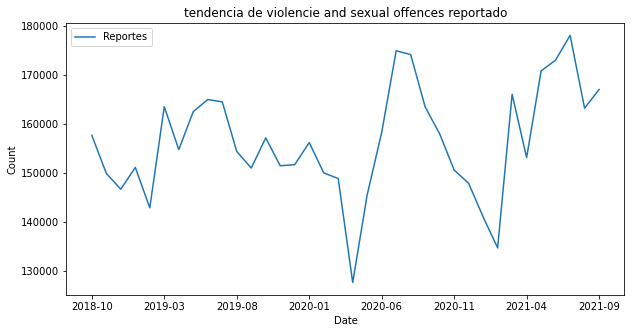

In [77]:
month_violence = violence.groupby(['Month']).agg(Count = ('Crime ID','count'))
month_violence.plot(figsize = (10,5))
plt.title('tendencia de violencie and sexual offences reportado')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['Reportes'])
plt.show()

se puede cortar en 2 trozos para tener una idea general de los reportes de `violence and sexual offences`
1. en el periodo 2018 a inicios del 2020, los casos reportados tenian una comportamiento constantes, teniendo ligeron subidas y bajadas pero teniendo una media constante entre los largo del tiempo.

2. Periodo mediados 2020 a 2021, Se ven que los casos tienen un bajon muy grande en el mes de abril del 2020 masomenos, pero la subida es muy grande a solo 2 meses de esto, despues de estas bajadas se ve que tiene una subida de los casos mas altos en comparacion de los casos anteriores a estos periodos subiendo la media de reportes, sacando los picos bajos 

In [81]:
violence['Last outcome category'].value_counts(normalize = True)

Unable to prosecute suspect                            0.515330
Investigation complete; no suspect identified          0.175570
Status update unavailable                              0.115948
Under investigation                                    0.060243
Court result unavailable                               0.048021
Action to be taken by another organisation             0.020340
Local resolution                                       0.016193
Offender given a caution                               0.011718
Awaiting court outcome                                 0.011446
Further investigation is not in the public interest    0.010752
Formal action is not in the public interest            0.006687
Further action is not in the public interest           0.003043
Offender given community sentence                      0.001269
Defendant found not guilty                             0.000798
Offender sent to prison                                0.000753
Court case unable to proceed            

En las mayorias de los casos de Violence and sexual offences terminan de manera inconclusa, no se logra procesar al sujeto acusado, esto debe ser revisado con mas en detalle con las fichas tecnicas de los casos reportados

In [85]:
violence['Location'].value_counts(normalize=True)

No Location                          2.435407e-02
On or near Parking Area              2.311623e-02
On or near Supermarket               1.700121e-02
On or near Sports/Recreation Area    1.652292e-02
On or near Shopping Area             1.012998e-02
                                         ...     
On or near Saltersford Grove         1.766836e-07
On or near Chiltley Lane             1.766836e-07
On or near Lords Stile Lane          1.766836e-07
On or near Lymegrove                 1.766836e-07
On or near Roach                     1.766836e-07
Name: Location, Length: 229585, dtype: float64

Los casos reportados estan muy dispersas por todo el territorio de UK, haciendo esto un problema de gran rango para la sociedad y se debe aumentar el control policial

---
## Conclusion:

* Los casos que mas se registraron a lo largo del periodo 2018 a 2021 es Violence and Sexual offences, de los cuales la investigacion termina sin poder procesar al sujeto acusado; los casos reportados estan muy altos en los tiempos actuales, se ve que el delito se hace a lo largo de todo el territorio UK
* El lugar donde mas se registran es el Supermercados, donde los delitos son de menor grado, la conclusion de estas investigaciones terminan sin conocer quien fue el causante del delito, y donde mas se reportan estos delitos menores del supermercado es en `Metropolitan Police Service`
* Dentro de Metropolitan Police Service se ve que los casos mas reportados son delitos muy graves como anti-social behaviour y Violence and Sexual offences